In [19]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime
import zipfile
import math

In [20]:
#Part 1

In [ ]:
#1

In [21]:
GOOG = pd.read_csv("data_ws2025/GOOG.csv", parse_dates=["Date"])
PCG = pd.read_csv("data_ws2025/PCG.csv", parse_dates=["Date"])
AME = pd.read_csv("data_ws2025/AME.csv", parse_dates=["Date"])
GPN = pd.read_csv("data_ws2025/GPN.csv", parse_dates=["Date"])
ISRG = pd.read_csv("data_ws2025/ISRG.csv", parse_dates=["Date"])
GOOG.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04,87.280,87.434,84.812,85.825,38038000,0.0,0.0
1,2021-01-05,85.664,86.790,85.317,86.454,22906000,0.0,0.0
2,2021-01-06,84.553,86.806,84.373,86.175,52042000,0.0,0.0
3,2021-01-07,86.412,88.812,86.262,88.755,45300000,0.0,0.0
4,2021-01-08,88.791,89.877,88.074,89.746,41012000,0.0,0.0


In [28]:
(GOOG["High"] == GOOG["Low"]).all()=="True"

False

In [26]:
(GPN["High"] == GPN["Low"]).all()=="True"

False

In [27]:
(ISRG["High"] == ISRG["Low"]).all()=="True"

False

In [24]:
(PCG["High"] == PCG["Low"]).all()=="True"

False

In [29]:
(AME["High"] == AME["Low"]).all()=="True"

False

In [30]:
#1 Answer:  there is no such company

In [31]:
#2


In [32]:
companies = {"GOOG": GOOG, "GPN": GPN, "ISRG": ISRG, "PCG": PCG, "AME": AME}

In [38]:
for firm, df in companies.items():
    print(f"the highest recorded price for company {firm} is {df['High'].max()}")
    print(f"the lowest recorded  price for company {firm} is {df['High'].min()}")

the highest recorded price for company GOOG is 202.225
the lowest recorded  price for company GOOG is 85.962
the highest recorded price for company GPN is 212.252
the lowest recorded  price for company GPN is 91.784
the highest recorded price for company ISRG is 556.23
the lowest recorded  price for company ISRG is 186.97
the highest recorded price for company PCG is 21.587
the lowest recorded  price for company PCG is 8.488
the highest recorded price for company AME is 197.026
the lowest recorded  price for company AME is 106.241


In [42]:
#3

In [59]:
for firm, df in companies.items():
    df["LogReturns"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
    print(f"for company {firm} the min Log Return is {df['LogReturns'].min()}")
    print(f"for company {firm} the max Log Return is {df['LogReturns'].max()}")
    print(f"for company {firm} the mean Log Return is {np.mean(df['LogReturns'])}")
    print(f"for company {firm} the standard deviation of Log Returns is {df['LogReturns'].std()}")
    print(f"for company {firm} the skewness of Log Returns is {df['LogReturns'].skew()}")



for company GOOG the min Log Return is -0.1013098917537576
for company GOOG the max Log Return is 0.09499372465572264
for company GOOG the mean Log Return is 0.0008031297474062645
for company GOOG the standard deviation of Log Returns is 0.019369503411447372
for company GOOG the skewness of Log Returns is -0.14414825329894573
for company GPN the min Log Return is -0.1313309643538485
for company GPN the max Log Return is 0.09097701745926212
for company GPN the mean Log Return is -0.0005923501491984345
for company GPN the standard deviation of Log Returns is 0.021062106633555917
for company GPN the skewness of Log Returns is -0.7668837582319649
for company ISRG the min Log Return is -0.1547392813497135
for company ISRG the max Log Return is 0.10325268076060556
for company ISRG the mean Log Return is 0.0006790866952476591
for company ISRG the standard deviation of Log Returns is 0.020502634106801795
for company ISRG the skewness of Log Returns is -0.15013621887024786
for company PCG the m

In [40]:
#4

In [61]:
for firm, df in companies.items():
    gain = df.loc[df['LogReturns'] == df["LogReturns"].max(), 'Date']
    loss = df.loc[df['LogReturns'] == df["LogReturns"].min(), 'Date']
    print(f"{firm}'s highest logarithmic gain was recorded on {gain[gain.index[0]]}")
    print(f"{firm}'s lowest logarithmic gain was recorded on {loss[loss.index[0]]}")


GOOG's highest logarithmic gain was recorded on 2024-04-26 00:00:00
GOOG's lowest logarithmic gain was recorded on 2022-10-26 00:00:00
GPN's highest logarithmic gain was recorded on 2023-08-01 00:00:00
GPN's lowest logarithmic gain was recorded on 2022-11-03 00:00:00
ISRG's highest logarithmic gain was recorded on 2023-04-19 00:00:00
ISRG's lowest logarithmic gain was recorded on 2022-04-22 00:00:00
PCG's highest logarithmic gain was recorded on 2022-10-04 00:00:00
PCG's lowest logarithmic gain was recorded on 2022-02-10 00:00:00
AME's highest logarithmic gain was recorded on 2024-10-31 00:00:00
AME's lowest logarithmic gain was recorded on 2024-08-01 00:00:00


In [62]:
#5

In [71]:
for firm, df in companies.items():
    medweeklyvol = df["Volume"].rolling(7).median()
    print(f"the median calendar weekly volume for {firm} was {medweeklyvol}")

the median calendar weekly volume for GOOG was 0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
999     26981200.0
1000    26981200.0
1001    24129500.0
1002    15235900.0
1003    14693000.0
Name: Volume, Length: 1004, dtype: float64
the median calendar weekly volume for GPN was 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
999     1767100.0
1000    1767100.0
1001    1386000.0
1002    1053900.0
1003    1043900.0
Name: Volume, Length: 1004, dtype: float64
the median calendar weekly volume for ISRG was 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
999     1488100.0
1000    1488100.0
1001    1475800.0
1002    1069800.0
1003    1013200.0
Name: Volume, Length: 1004, dtype: float64
the median calendar weekly volume for PCG was 0              NaN
1              NaN
2              NaN
3              NaN
4   

In [72]:
#6

In [ ]:
#8

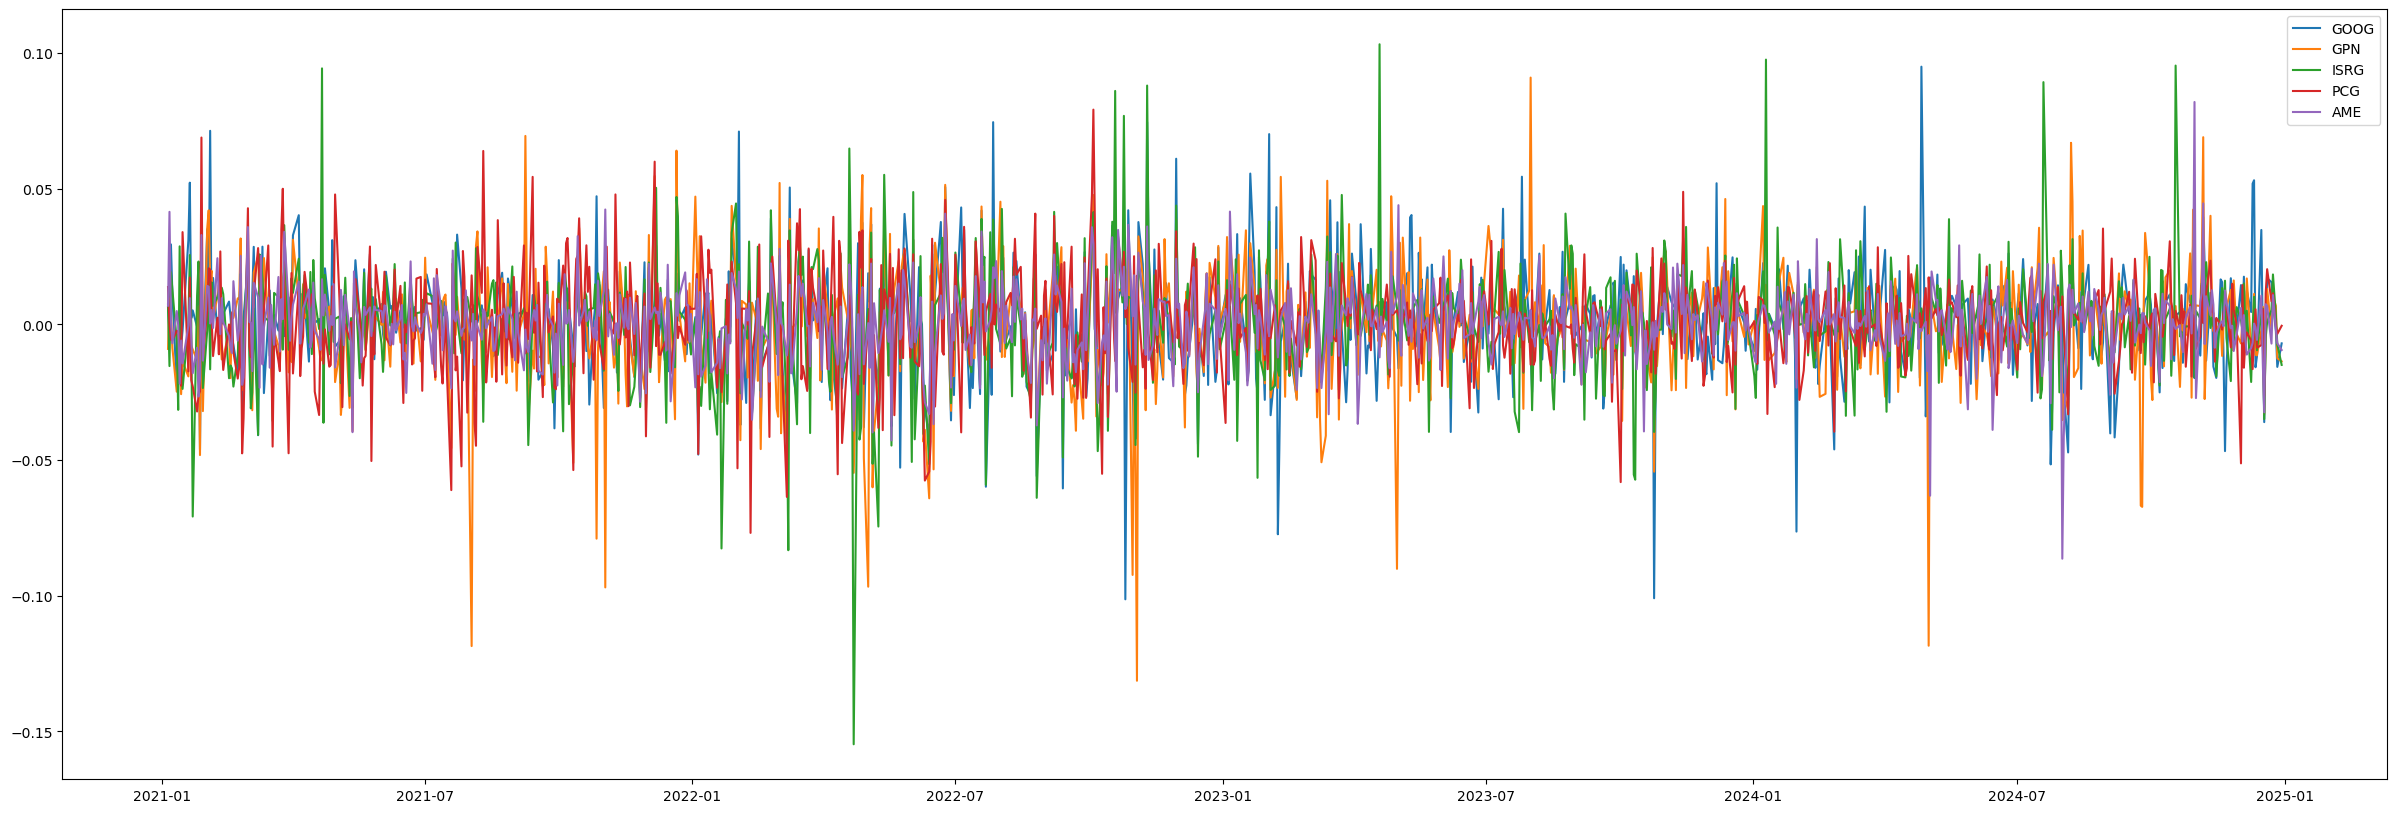

In [86]:
plt.subplots(1,1, figsize = (30,10))
for firm, df in companies.items():
    plt.plot(df["Date"],df["LogReturns"], label = firm)
plt.legend()

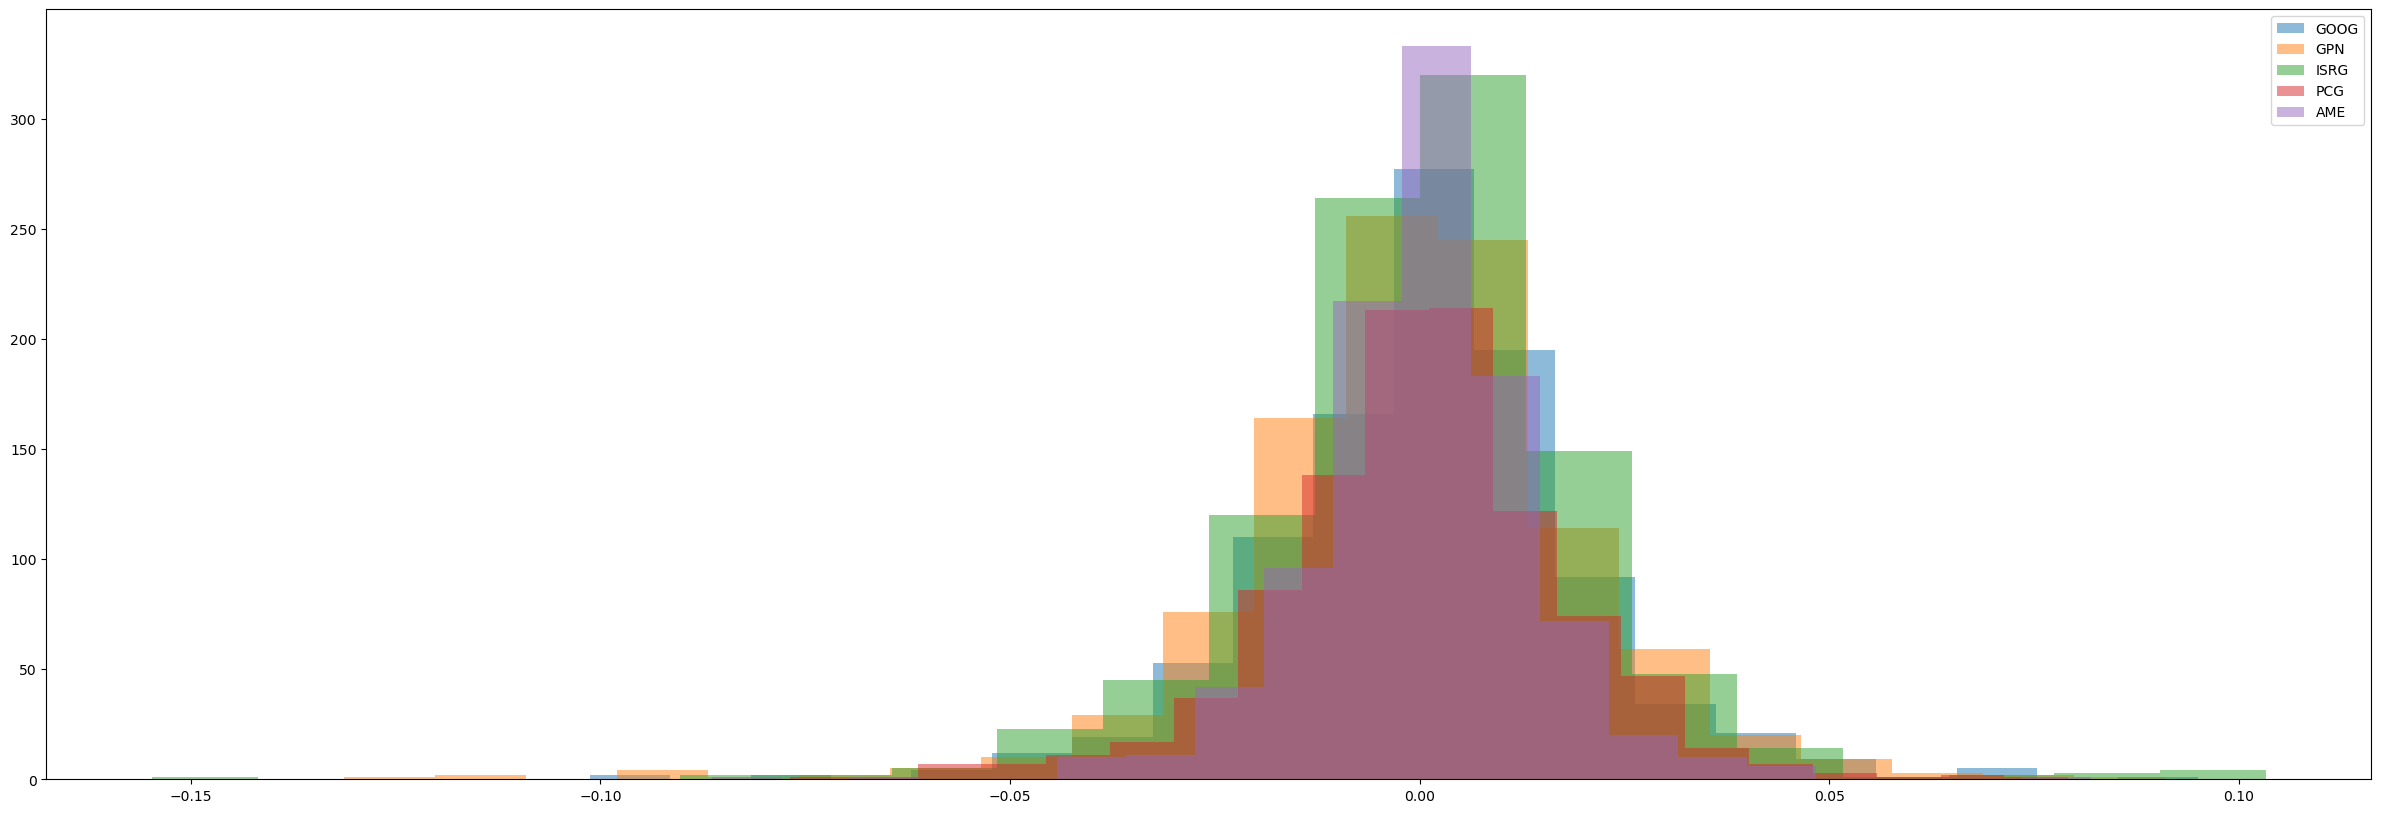

In [94]:
plt.subplots(1,1, figsize = (30,10))
for firm, df in companies.items():
    plt.hist(df["LogReturns"], label = firm, bins= 20, alpha = 0.5)
plt.legend()

In [98]:
#Part 2

In [125]:
data_no_subindustry =pd.read_csv("companies_no_subindustry.csv")
data_no_subindustry.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [97]:
#1

In [126]:
missing_inclusion = data_no_subindustry["included"].isnull().sum()
print(f"{missing_inclusion} companies didn't fill in the date of inclusion")

45 companies didn't fill in the date of inclusion


In [105]:
#2

In [154]:
data_no_subindustry = data_no_subindustry.dropna(subset="included")

In [106]:
#3

(array([], dtype=float64), [])

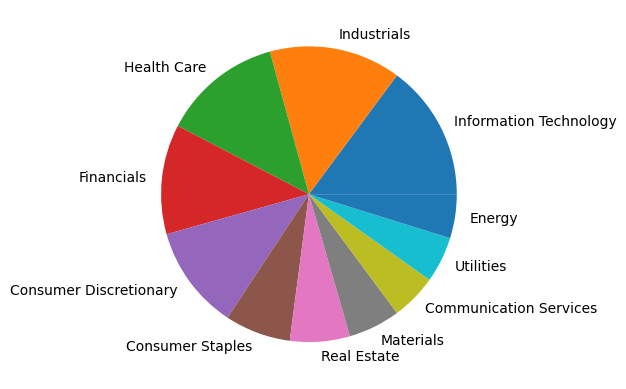

In [155]:
sector = data_no_subindustry["GICS_Sector"].value_counts().reset_index()
plt.pie(sector["count"], labels= sector["GICS_Sector"])
plt.xticks(rotation = 90)

In [111]:
#4

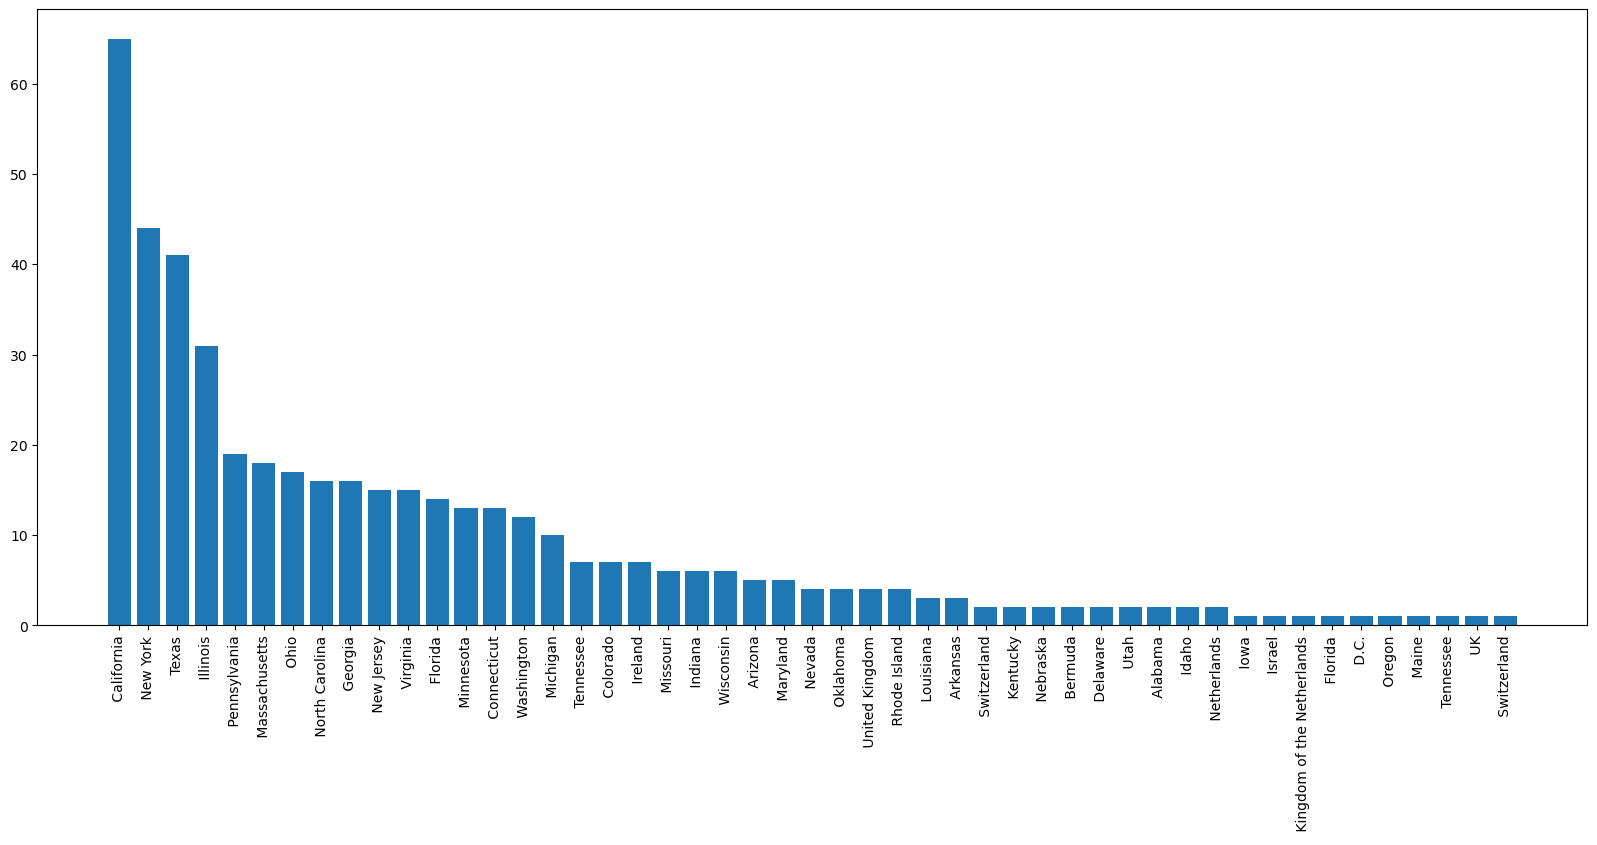

In [156]:
data_no_subindustry["state"] = data_no_subindustry["hq"].apply(lambda x: x.split(",")[-1])
states = data_no_subindustry["state"].value_counts().reset_index()
plt.subplots(1,1, figsize = (20,8))
plt.bar(states["state"], states["count"])
plt.xticks(rotation = 90)
plt.show()

In [116]:
#5

In [157]:
data_subindustry =pd.read_csv("companies_subindustry.csv")
data_subindustry.head()

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [158]:
merged = data_no_subindustry.merge(data_subindustry, on="Symbol")


In [138]:
#Part3

In [140]:
#1

In [145]:
a = np.random.randint(100, 500)
b = np.random.randint(100, 500)
c = np.random.randint(100, 500)
d = np.random.randint(100, 500)


In [159]:
ran_var_normal  = np.random.normal(0,1,a)
ran_var_uniform = np.random.uniform(0,1,b)
ran_var_expon   = np.random.exponential(1,c)
ran_var_binom   = np.random.binomial(10,0.5,d)